<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/CV_NLP_trained_models/class_001_image_trained_models_cats_part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
from matplotlib import pyplot as plt
import skimage.feature
from string import digits
import seaborn as sns
import skimage
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imageio import imread

In [ ]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

Cloning into 'Machine_Learning_DataSet'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 262 (delta 23), reused 57 (delta 20), pack-reused 195 (from 1)
Receiving objects: 100% (262/262), 73.44 MiB | 28.49 MiB/s, done.
Resolving deltas: 100% (87/87), done.
/content/Machine_Learning_DataSet


In [ ]:
# check: https://pythontutorials.eu/deep-learning/transfer-learning/#

In [ ]:
FILE='cats.zip'
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [ ]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [ ]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

data = np.empty((40, 224, 224, 3))

for i in range(0, 20):
    if('jpg' in img_name[i]):
      im = cv2.imread(img_name[i])
      im = cv2.resize(im, (224, 224))
      im = preprocess_input(im)
      if(max(im.flatten())>1):
        im = im/max(im.flatten())
      data[i] = im

for i in range(0, 20):
    if('jpg' in img_name[i+20]):
      im = np.array(cv2.imread(img_name[i+20]))
      im = cv2.resize(im,(224, 224))
      im = preprocess_input(im)
      if(max(im.flatten())>1):
        im = im/max(im.flatten())
      data[i + 20] = im

labels = np.empty(40, dtype=int)
labels[:20] = 0
labels[20:] = 1

In [ ]:
data.shape

(40, 224, 224, 3)

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

model = MobileNetV2(weights='imagenet')

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.applications.mobilenet_v2 import decode_predictions

predictions = model.predict(data)
for decoded_prediction in decode_predictions(predictions, top=1):
    for name, desc, score in decoded_prediction:
        print('- {} ({:.2f}%)'.format(desc, 100 * score))

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
- matchstick (7.81%)
- Siamese_cat (24.27%)
- Siamese_cat (34.31%)
- tabby (32.32%)
- tiger_cat (22.87%)
- tabby (74.02%)
- Siamese_cat (43.89%)
- Siamese_cat (63.72%)
- Persian_cat (64.12%)
- tabby (83.47%)
- Persian_cat (21.44%)
- tabby (50.04%)
- tabby (45.98%)
- Egyptian_cat (52.88%)
- tabby (49.10%)
- tabby (42.63%)
- tabby (77.33%)
- tabby (24.56%)
- tabby (7.53%)
- Egyptian_cat (35.54%)
- Egyptian_cat (60.96%)
- Egyptian_cat (55.87%)
- Egyptian_cat (61.45%)
- Egyptian_cat (48.52%)
- Egyptian_cat (14.59%)
- tabby (73.19%)
- tabby (42.88%)
- Egyptian_cat (28.94%)
- Egyptian_cat (33.16%)
- lynx (23.30%)
- Egyptian_cat (33.36%)
- Arctic_fox (45.06%)
- Siamese_cat (22.66%)
- Siamese_cat (48.55%)
- Siamese_cat (71.27%)
- Egyptian_cat (47.61%)
- Egyptian_cat (18.50%)
- tabby (24.14%)
- Egyptian_cat (24.38%)
- Egyptian_cat (44.95%)


In [ ]:
cont =0
for i in decode_predictions(predictions, top=1):
  cont += 1
print(cont)

40


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

In [ ]:
# The first 15 images for male and female cats will be used for training
training_data = np.empty((30, 224, 224, 3))
training_data[:15] = data[:15]
training_data[15:] = data[20:35]
training_labels = np.empty(30)
training_labels[:15] = 0
training_labels[15:] = 1
# The last 5 images for male and female cats will be used for validation
validation_data = np.empty((10, 224, 224, 3))
validation_data[:5] = data[15:20]
validation_data[5:] = data[35:]
validation_labels = np.empty(10)
validation_labels[:5] = 0
validation_labels[5:] = 1

In [ ]:
training_labels.shape

(30,)

In [ ]:
cat_output2 = Dense(1, activation= 'sigmoid') #'relu')
cat_output2 = cat_output2(model.layers[-2].output)
cat_input2 = model.input
cat_model2 = Model(inputs=cat_input2, outputs=cat_output2)
for layer in cat_model2.layers[:-1]:
    layer.trainable = False
'''
cat_model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
'''

"\ncat_model2.compile(\n    optimizer='adam',\n    loss='sparse_categorical_crossentropy',\n    metrics=['accuracy']\n)\n"

In [ ]:
'''cat_model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
'''

"cat_model2.compile(optimizer='adam',\n              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n              metrics=['accuracy'])\n"

In [ ]:
'''base_learning_rate = 0.0001
cat_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])'''
base_learning_rate = 0.0001
cat_model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
r = cat_model2.fit(
    x=training_data,
    y=training_labels,
    validation_data=(validation_data, validation_labels),
    epochs=250,
    verbose=2
)

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 - 10s - 10s/step - accuracy: 0.5000 - loss: 0.7222 - val_accuracy: 0.7000 - val_loss: 0.7183
Epoch 2/250
1/1 - 2s - 2s/step - accuracy: 0.5333 - loss: 0.7097 - val_accuracy: 0.7000 - val_loss: 0.7155
Epoch 3/250
1/1 - 3s - 3s/step - accuracy: 0.5333 - loss: 0.7008 - val_accuracy: 0.7000 - val_loss: 0.7132
Epoch 4/250
1/1 - 2s - 2s/step - accuracy: 0.5667 - loss: 0.6935 - val_accuracy: 0.7000 - val_loss: 0.7112
Epoch 5/250
1/1 - 2s - 2s/step - accuracy: 0.5667 - loss: 0.6871 - val_accuracy: 0.7000 - val_loss: 0.7093
Epoch 6/250
1/1 - 3s - 3s/step - accuracy: 0.5667 - loss: 0.6813 - val_accuracy: 0.7000 - val_loss: 0.7076
Epoch 7/250
1/1 - 2s - 2s/step - accuracy: 0.6000 - loss: 0.6759 - val_accuracy: 0.7000 - val_loss: 0.7059
Epoch 8/250
1/1 - 2s - 2s/step - accuracy: 0.6333 - loss: 0.6708 - val_accuracy: 0.7000 - val_loss: 0.7044
Epoch 9/250
1/1 - 3s - 3s/step - accuracy: 0.6333 - loss: 0.6660 - val_accuracy: 0.7000 - val_loss: 0.7029
Epoch 10/250
1/1 - 2s - 2s/step - accuracy: 0.6

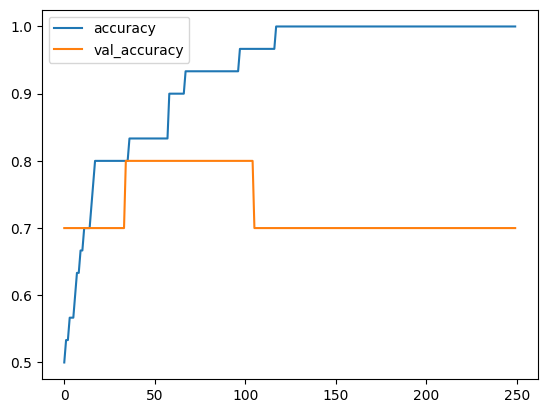

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

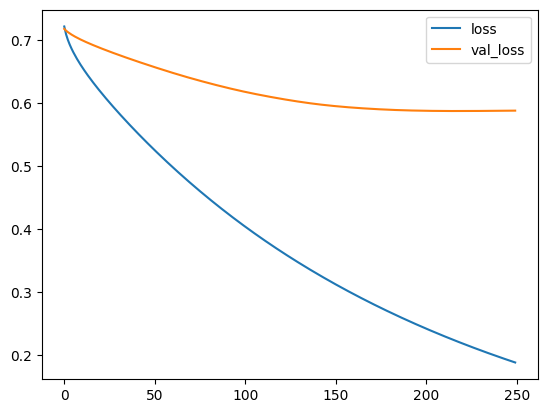

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

Cloning into 'Machine_Learning_DataSet'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 269 (delta 26), reused 57 (delta 20), pack-reused 195 (from 1)
Receiving objects: 100% (269/269), 74.07 MiB | 31.89 MiB/s, done.
Resolving deltas: 100% (90/90), done.
/content/Machine_Learning_DataSet/Machine_Learning_DataSet/Machine_Learning_DataSet


In [ ]:
FILE='cat_what.zip'
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [ ]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [ ]:
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
X= []
names =[]
Img_Size = 224
ref = 'jpeg'
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name):
    names.append(name)
    img =cv2.imread(name)
    img = cv2.resize(img, (224, 224))
    #img = preprocess_input(img)
    X.append(cv2.resize(img, (Img_Size,Img_Size)))

In [ ]:
img_name

['WhatsApp Image 2025-06-14 at 16.15.45.jpeg',
 'WhatsApp Image 2025-06-14 at 16.15.46.jpeg',
 'WhatsApp Image 2025-06-14 at 16.15.46 (1).jpeg',
 'WhatsApp Image 2025-06-14 at 17.58.08.jpeg']

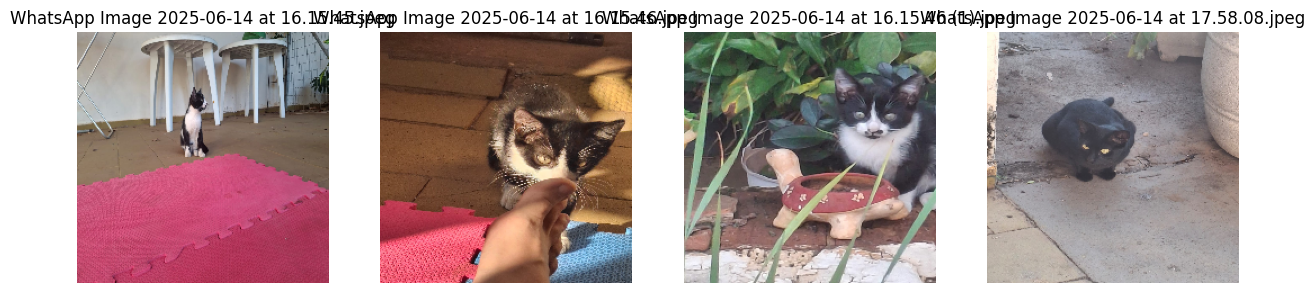

In [ ]:
plt.figure(figsize=(15, 15))
n = len(img_name)
lista = img_name
names = img_name
for i in range(n):
  ax = plt.subplot(4, 4, i + 1)
  k = i
  RGB_img = cv2.cvtColor(X[k], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(names[k])
  plt.axis("off")

In [ ]:
X_input = np.stack(X)  # se X for uma lista de arrays
predict = cat_model2.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
predict

array([[0.60936046],
       [0.44679314],
       [0.5134808 ],
       [0.6075257 ]], dtype=float32)

In [ ]:
predict_test = cat_model2.predict(validation_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
predict_test

array([[0.68106997],
       [0.20347466],
       [0.6601449 ],
       [0.6360829 ],
       [0.31265175],
       [0.6461425 ],
       [0.6855642 ],
       [0.73497754],
       [0.76656187],
       [0.5160136 ]], dtype=float32)

In [ ]:
validation_labels

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [ ]:
FILE='cats.zip'
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [ ]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [ ]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [ ]:
img_name

['cats/',
 'cats/f01.jpg',
 'cats/f02.jpg',
 'cats/f03.jpg',
 'cats/f04.jpg',
 'cats/f05.jpg',
 'cats/f06.jpg',
 'cats/f07.jpg',
 'cats/f08.jpg',
 'cats/f09.jpg',
 'cats/f10.jpg',
 'cats/f11.jpg',
 'cats/f12.jpg',
 'cats/f13.jpg',
 'cats/f14.jpg',
 'cats/f15.jpg',
 'cats/f16.jpg',
 'cats/f17.jpg',
 'cats/f18.jpg',
 'cats/f19.jpg',
 'cats/f20.jpg',
 'cats/m01.jpg',
 'cats/m02.jpg',
 'cats/m03.jpg',
 'cats/m04.jpg',
 'cats/m05.jpg',
 'cats/m06.jpg',
 'cats/m07.jpg',
 'cats/m08.jpg',
 'cats/m09.jpg',
 'cats/m10.jpg',
 'cats/m11.jpg',
 'cats/m12.jpg',
 'cats/m13.jpg',
 'cats/m14.jpg',
 'cats/m15.jpg',
 'cats/m16.jpg',
 'cats/m17.jpg',
 'cats/m18.jpg',
 'cats/m19.jpg',
 'cats/m20.jpg']

In [ ]:
img_name[15:20],img_name[35:]

(['cats/f15.jpg',
  'cats/f16.jpg',
  'cats/f17.jpg',
  'cats/f18.jpg',
  'cats/f19.jpg'],
 ['cats/m15.jpg',
  'cats/m16.jpg',
  'cats/m17.jpg',
  'cats/m18.jpg',
  'cats/m19.jpg',
  'cats/m20.jpg'])